## Домашнее задание

### 1. Загрузите тренировочные и тестовые датасеты

In [165]:
import pandas as pd
from category_encoders import TargetEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [166]:
Xtrain = pd.read_csv("TrainData.csv")
Xtest = pd.read_csv("TestData.csv")

In [167]:
Xtrain

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,target
0,50,218.593930,273536,0.104575,4,0.445026,0.274531,0.444334,5.970149,0.300298,0.0,0,49,0.100000,0
1,32,276.771005,173314,0.224684,11,0.445026,0.439103,0.444334,5.970149,0.300298,0.0,0,60,0.244418,0
2,38,218.593930,28887,0.032491,7,0.445026,0.274531,0.444334,25.606721,0.300298,0.0,0,50,0.244418,0
3,19,218.593930,427862,0.179322,10,0.049127,0.044987,0.009499,25.606721,0.300298,0.0,0,35,0.244418,0
4,44,218.593930,109339,0.032491,7,0.098837,0.115721,0.066581,5.970149,0.113590,0.0,0,46,0.185185,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,48,218.593930,329778,0.171817,9,0.066372,NaN,0.066581,25.606721,0.113590,0.0,0,40,0.244418,0
7496,25,218.593930,104439,0.179322,10,0.049127,0.131370,0.103024,25.606721,0.113590,0.0,0,50,0.244418,0
7497,50,218.593930,162632,0.171817,9,0.445026,0.482222,0.444334,25.606721,0.300298,0.0,0,45,0.244418,0
7498,51,276.771005,174824,0.171817,9,0.049127,0.093897,0.103024,25.606721,0.300298,8614.0,0,40,0.244418,1


In [168]:
Xtest

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,target
0,31,238.933333,47296,0.238933,10,0.238933,0.238933,0.238933,23.893333,0.238933,0,1740,20,0.238933,0
1,24,238.933333,33088,0.238933,7,0.238933,0.238933,0.238933,23.893333,0.238933,0,0,40,0.238933,0
2,18,238.933333,283342,0.238933,7,0.238933,0.238933,0.238933,23.893333,0.238933,0,0,20,0.238933,0
3,19,238.933333,393712,0.238933,9,0.238933,0.238933,0.238933,23.893333,0.238933,0,0,20,0.238933,0
4,28,238.933333,200515,0.238933,10,0.238933,0.238933,0.238933,23.893333,0.238933,0,0,40,0.238933,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,40,238.933333,220589,0.238933,10,0.238933,0.238933,0.238933,23.893333,0.238933,0,0,40,0.238933,1
2496,54,238.933333,165278,0.238933,10,0.238933,0.238933,0.238933,23.893333,0.238933,0,0,40,0.238933,1
2497,44,238.933333,398473,0.238933,10,0.238933,0.238933,0.238933,23.893333,0.238933,0,0,70,0.238933,1
2498,35,238.933333,183898,0.238933,11,0.238933,0.238933,0.238933,23.893333,0.238933,7298,0,50,0.238933,1


In [169]:
Xtrain.duplicated().sum()

0

In [170]:
Xtest.duplicated().sum()

0

In [171]:
Xtrain.isnull().sum()

f1           0
f2          75
f3           0
f4           0
f5           0
f6           0
f7        1875
f8           0
f9           0
f10          0
f11         10
f12          0
f13          0
f14          0
target       0
dtype: int64

In [172]:
Xtrain.fillna(Xtrain.median(), inplace=True)

In [173]:
Xtrain.isnull().sum()

f1        0
f2        0
f3        0
f4        0
f5        0
f6        0
f7        0
f8        0
f9        0
f10       0
f11       0
f12       0
f13       0
f14       0
target    0
dtype: int64

In [174]:
Xtest.isnull().sum()

f1        0
f2        0
f3        0
f4        0
f5        0
f6        0
f7        0
f8        0
f9        0
f10       0
f11       0
f12       0
f13       0
f14       0
target    0
dtype: int64

In [175]:
Xtrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      7500 non-null   int64  
 1   f2      7500 non-null   float64
 2   f3      7500 non-null   int64  
 3   f4      7500 non-null   float64
 4   f5      7500 non-null   int64  
 5   f6      7500 non-null   float64
 6   f7      7500 non-null   float64
 7   f8      7500 non-null   float64
 8   f9      7500 non-null   float64
 9   f10     7500 non-null   float64
 10  f11     7500 non-null   float64
 11  f12     7500 non-null   int64  
 12  f13     7500 non-null   int64  
 13  f14     7500 non-null   float64
 14  target  7500 non-null   int64  
dtypes: float64(9), int64(6)
memory usage: 879.0 KB


In [176]:
Xtest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      2500 non-null   int64  
 1   f2      2500 non-null   float64
 2   f3      2500 non-null   int64  
 3   f4      2500 non-null   float64
 4   f5      2500 non-null   int64  
 5   f6      2500 non-null   float64
 6   f7      2500 non-null   float64
 7   f8      2500 non-null   float64
 8   f9      2500 non-null   float64
 9   f10     2500 non-null   float64
 10  f11     2500 non-null   int64  
 11  f12     2500 non-null   int64  
 12  f13     2500 non-null   int64  
 13  f14     2500 non-null   float64
 14  target  2500 non-null   int64  
dtypes: float64(8), int64(7)
memory usage: 293.1 KB


In [177]:
Xtrain.describe().T

,count,mean,std,min,25%,50%,75%,max
f1,7500.0,38.579600,13.647719,17.000000,28.000000,37.000000,47.000000,9.000000e+01
f2,7500.0,238.702194,75.843216,64.259070,218.593930,218.593930,218.593930,5.753968e+02
f3,7500.0,190384.986800,105867.442524,19302.000000,118019.000000,179568.500000,239441.750000,1.226583e+06
f4,7500.0,0.238933,0.151738,0.000029,0.171817,0.179322,0.239316,7.293233e-01
f5,7500.0,10.083200,2.546071,1.000000,9.000000,10.000000,12.000000,1.600000e+01
f6,7500.0,0.238934,0.190283,0.049127,0.049127,0.098837,0.445026,4.450262e-01
f7,7500.0,0.240810,0.127625,0.000000,0.131370,0.241573,0.274531,4.822222e-01
f8,7500.0,0.238933,0.193365,0.009499,0.066581,0.103024,0.444334,4.843750e-01
f9,7500.0,23.893333,4.451530,5.970149,25.606721,25.606721,25.606721,2.560672e+01
f10,7500.0,0.238933,0.087708,0.113590,0.113590,0.300298,0.300298,3.002979e-01


In [178]:
Xtest.describe().T

,count,mean,std,min,25%,50%,75%,max
f1,2500.0,38.069200,1.344217e+01,17.000000,27.000000,37.000000,47.000000,90.000000
f2,2500.0,238.933333,8.528219e-14,238.933333,238.933333,238.933333,238.933333,238.933333
f3,2500.0,191561.425200,1.075425e+05,19302.000000,119098.750000,177510.500000,238851.250000,910398.000000
f4,2500.0,0.238933,5.552226e-17,0.238933,0.238933,0.238933,0.238933,0.238933
f5,2500.0,10.056800,2.554875e+00,1.000000,9.000000,10.000000,12.000000,16.000000
f6,2500.0,0.238933,5.552226e-17,0.238933,0.238933,0.238933,0.238933,0.238933
f7,2500.0,0.238933,5.552226e-17,0.238933,0.238933,0.238933,0.238933,0.238933
f8,2500.0,0.238933,5.552226e-17,0.238933,0.238933,0.238933,0.238933,0.238933
f9,2500.0,23.893333,3.553424e-15,23.893333,23.893333,23.893333,23.893333,23.893333
f10,2500.0,0.238933,5.552226e-17,0.238933,0.238933,0.238933,0.238933,0.238933


### 2. Оцените баланс классов в задаче
- Затем попытайтесь устно ответить на вопрос, можно ли использовать accuracy как метрику качества в задаче?

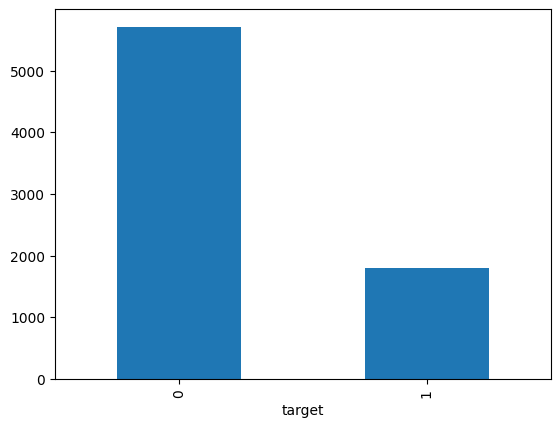

In [179]:
Xtrain.target.value_counts().plot(kind='bar');

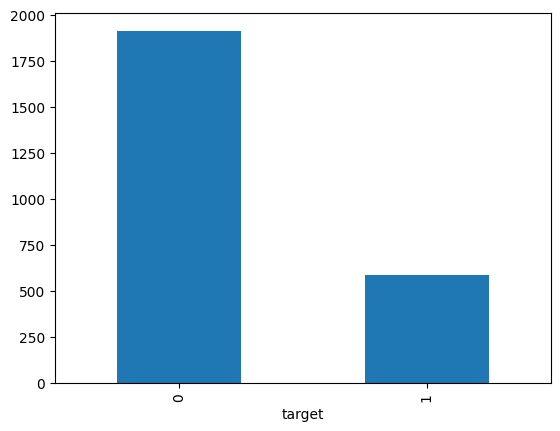

In [180]:
Xtest.target.value_counts().plot(kind='bar');

Видно, что классы достаточно несбалансированны в двух датасетах. Класс '0' более чем в три раза превышает класс '1'.

Использовать accuracy в качестве единственной метрики качества для задач с несбалансированными классами не рекомендуется. Вот почему:

 Accuracy может быть обманчивой.  Если у нас очень много объектов одного класса (например, 90% "0" и 10% "1") модель может достичь высокой accuracy, просто предсказывая все объекты как "0". В этом случае модель не будет уметь распознавать реальные случаи "1", что недопустимо для многих задач.

 Accuracy не отражает реальную производительность. В задачах с несбалансированными классами важно уметь  правильно предсказывать объекты редкого класса. Accuracy не дает нам такой информации, так как она просто считает общее количество верных предсказаний.

Что делать вместо этого?

Для оценки моделей с несбалансированными классами лучше использовать другие метрики, такие как:

 Precision:  Доля верных предсказаний среди всех предсказанных объектов определенного класса.
 Recall (Sensitivity): Доля верных предсказаний среди всех объектов этого класса в выборке.
 F1-score:  Гармоническое среднее между precision и recall.
 AUC (Area Under the Curve): Площадь под кривой ROC (Receiver Operating Characteristic), которая показывает, насколько хорошо модель различает два класса.

### 3. Постройте baseline-модель:
- разбейте TrainData на тренировочные (Train) и тестовые данные (Test);
- обучите LogisticRegression и SVC с параметрами по умолчанию на тренировочных данных (Train);
- примените модели на тестовых данных (Test).

In [181]:
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [182]:
# Разделение данных на обучающие и тестовые
X = Xtrain.drop("target", axis=1) 
y = Xtrain["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [183]:
# Обучение моделей
# LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

/home/zaur/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [184]:
# SVC
svc = SVC()
svc.fit(X_train, y_train)

SVC()

In [185]:
# Предсказание на тестовых данных
y_pred_logreg = logreg.predict(X_test)
y_pred_svc = svc.predict(X_test)

In [186]:
# Оценка точности
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
accuracy_svc = accuracy_score(y_test, y_pred_svc)

print(f"Точность LogisticRegression: {accuracy_logreg}")
print(f"Точность SVC: {accuracy_svc}")

Точность LogisticRegression: 0.804
Точность SVC: 0.782


### 4. Улучшите модели
Попробуйте улучшить качество обученных моделей:
- можете задавать class_weights;
- можете изменять параметры модели;
- можете вручную или при помощи методов Python генерировать новые признаки и/или удалять существующие.

Это самая важная и творческая часть задания. Проводите как можно больше экспериментов!

Проведите минимиум три эксперимента: для каждого типа модели минимум один эксперимент.

## Решение

1. Модель: Логистическая регрессия

Эксперимент 1: Взвешивание классов (class_weights)

Описание:

- Проблема: В данных наблюдается несбалансированность классов.
- Решение: Используем параметр `class_weight='balanced'` в `LogisticRegression` для автоматического взвешивания классов.

In [187]:
# Создаем модель с взвешиванием классов
model_lg = LogisticRegression(class_weight='balanced', random_state=42)

In [188]:
# Обучаем модель
model_lg.fit(X_train, y_train)

# Делаем предсказания
y_pred_log = model_lg.predict(X_test)

/home/zaur/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [189]:
# Вычисляем метрики
accuracy = accuracy_score(y_test, y_pred_log)
print("Accuracy:", accuracy)

Accuracy: 0.654


2. Модель: Случайный лес (Random Forest)

Эксперимент 2: Изменение параметров модели

Описание:

- Проблема: Модель переобучается на обучающей выборке.
- Решение: Изменяем параметры модели, например, увеличиваем количество деревьев `n_estimators` и уменьшаем глубину деревьев `max_depth`.

In [190]:
from sklearn.ensemble import RandomForestClassifier

In [191]:
# Создаем модель с измененными параметрами
model_rf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)

# Обучаем модель
model_rf.fit(X_train, y_train)

# Делаем предсказания
y_pred_rf = model_rf.predict(X_test)

In [192]:
# Вычисляем метрики
accuracy = accuracy_score(y_test, y_pred_rf)
print("Accuracy:", accuracy)

Accuracy: 0.8406666666666667


3. Модель: Градиентный бустинг (Gradient Boosting)

Эксперимент 3: Генерация новых признаков

Описание:

- Проблема:  Существующие признаки не достаточно информативны для модели.
- Решение:  Создаем новые признаки на основе существующих, например, с помощью `PolynomialFeatures`.

In [193]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import GradientBoostingClassifier

In [194]:
# Создаем полиномиальные признаки
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [195]:
# Создаем модель
model_gb = GradientBoostingClassifier(random_state=42)

In [196]:
# Обучаем модель
model_gb.fit(X_train_poly, y_train)

# Делаем предсказания
y_pred_gb = model_gb.predict(X_test_poly)

In [197]:
# Вычисляем метрики
accuracy = accuracy_score(y_test, y_pred_gb)
print("Accuracy:", accuracy)

Accuracy: 0.8586666666666667


### 5. Оцените на отложенной выборке качество наилучшей модели
В пунктах 3 и 4 вы построили много разных моделей.

Возьмите ту, которая дала наилучшее качество на тестовых данных (Test). Примените её на отложенной выборке (TestData) и выведите на экран значение метрики f1.

In [208]:
# Применение модели на отложенной выборке
y_pred_rf = model_rf.predict(Xtest.drop('target', axis=1))

In [209]:
f1_score = f1_score(Xtest['target'], y_pred_rf)

In [210]:
print(f'F1-score на отложенной выборке: {f1_score}')

F1-score на отложенной выборке: 0.31563845050215206


### 6. Выполните хитрый трюк
Часто смешивание различных моделей даёт улучшение итогового предсказания. Попробуйте смешать две лучшие модели по формуле:
$$pred_{final} = \alpha\cdot pred_1 + (1-\alpha)\cdot pred_2$$.

Значение $\alpha$ подберите в цикле по Test-выборке. Оцените качество на отложенной выборке.

Удалось ли добиться улучшения качества?

In [201]:
print(y_pred_rf.shape)
print(y_pred_gb.shape)
print(y.shape)

(2500,)
(1500,)
(7500,)


In [202]:
min_length = min(len(y_pred_rf), len(y_pred_gb))
Y_pred_rf = y_pred_rf[:min_length]
Y_pred_gb = y_pred_gb[:min_length]
Y = y[:min_length]
#pred_final = (alpha * Y_pred_rf + (1 - alpha) * Y_pred_gb).astype(int)

In [203]:
print(Y_pred_rf.shape)
print(Y_pred_gb.shape)
print(Y.shape)

(1500,)
(1500,)
(1500,)


In [211]:
from sklearn.metrics import f1_score

for i in range(0, 101):
    alpha = i / 100
    pred_final = (alpha * Y_pred_rf + (1 - alpha) * Y_pred_gb).astype(int)
    true_alpha = 0
    f1 = 0
    if f1_score(Y, pred_final) > f1:
      true_alpha = alpha
      f1 = f1_score(Y, pred_final)
print(f'{f1=}, {true_alpha=}') 


f1=0.06205250596658711, true_alpha=1.0


### 7. Сделайте выводы

Запишите в отдельной ячейке текстом выводы о проделанной работе. Для этого ответьте на вопросы:
- Какие подходы вы использовали для улучшения работы baseline-моделей?
- Какого максимального качества удалось добиться на Test-данных?
- Какое при этом получилось качество на отложенной выборке?
- Ваша модель переобучилась, недообучилась или обучилась как надо?

ВЫВОДЫ

В работе использовались следующие модели модели: Логистическая регрессия, Логистическая регрессия с взвешиванием классов, Случайный лес и Градиентный бустинг с генерацией новых признаков.

На тестовых данных лучшее качество модели наблюдается в моделях случайный лес и градиентный бустинг.

Если говорить в общем, то при смешивании модели метрика f1 ухудшилась. Возможно это связано с тем, что случайный лес и градиентный бустинг имеют разное количество строк и для нахождения показателя pred_final мы взяли часть данных(привели к одинаковым значениям строк), что в результате мы потеряли часть данных.

Наблюдается признаки недообучения(низкое значение метрики f1 на тестовых данных лучшей модели Случайный лес). Если говорить в общем, нужно дальше тестировать различные модели с различными гиперпараметрами.